3. Now let's go back to the cased where the landmark location is known. Design and implement a particle filter with 1000 particles to estimate the states of the robots with the following steps:  
    `[10 points]` 3.1. Generate particles for the initial state estimate, show particle set project on to the $x$-$y$ plane, and draw the 1-$\sigma$ sample ellipse.   
    `[10 points]` 3.2. Plot the sample distribution and the 1-$\sigma$ sample ellipse on the $x$-$y$ plane at $t=5$.  
    `[15 points]` 3.3. Implement the particle filter where resampling happens everytime a range measurement is available (i.e., every 10 seconds). Plot the sample distribution and the 1-$\sigma$ sample ellipse on the $x$-$y$ plane at $t=0$ both before and after the update step.  
    `[ 5 points]` 3.4. For $t=[0, 100]$, use Gaussian approxiamtions of the particle set to plot the estimated states along with their 1-$\sigma$ bounds. You should have three separate plots, one for each state. 
    
#### `Note`: You should make sure that your heading angle is always in between $[0, 2\pi]$.

#### `[10 points]` 3.1. Generate particles for the initial state estimate, show particle set project on to the $x$-$y$ plane, and draw the 1-$\sigma$ sample ellipse.

In [1]:
# Functions
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

# To plot the confidence ellipse
def confidence_ellipse(x, y, ax, n_std=3.0, facecolor='none', **kwargs):
    """
    Create a plot of the covariance confidence ellipse of *x* and *y*.
    
    Parameters
    ----------
    x, y : array-like, shape (n, )
        Input data.
        
    ax : matplotlib.axes.Axes
        The axes object to draw the ellipse into. 
        
    n_std : float
        The number of standard deviations to determine the ellipse's raiuses.
        
    **kwargs
        Forwarded to `-matplotlib.patches.Ellipse`
    
    Returns
    -------
    matplotlib.patches.Ellipse
    """
    if x.size != y.size:
        raise ValueError("x and y must be the same size")
        
    cov = np.cov(x,y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensional dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2,
                          facecolor=facecolor, **kwargs)
    
    # Calculating the standard deviation of x from 
    # the squareroot of the variance and multiplying 
    # with the given number of standard deviations. 
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)
    
    # calculating the standard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)
    
    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)
    
    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)

# To calculate the weight of a particle
def weight(particle, z):
    # Calculate the Euclidean distance 'd' of the particle
    d = np.sqrt(particle[0]*particle[0] + particle[1]*particle[1])
    
    # Calculate the weight
    w = 1/np.sqrt(2*np.pi*sigma_z**2) * np.exp(- ((z - d)**2) / (sigma_z**2))
    return w

# Low variance sampler function
def low_variance_sampler(particles, weights):
    nparticle = np.size(particles, 1)
    new_particles = np.empty(np.shape(particles))
    r = np.random.uniform(0, 1/nparticle)
    c = weights[0]
    i = 0
    for n in range(nparticle):
        U = r + (n-1) * (1/nparticle)
        while U > c:
            i += 1
            c += weights[i]
        new_particles[:,n] = particles[:,i]
    return new_particles

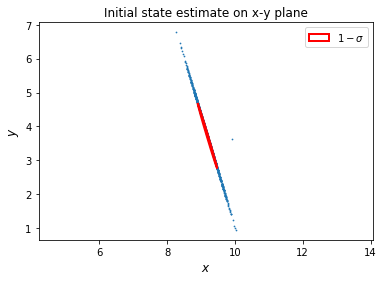

In [6]:
# Import libraries 
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# Initialize variables
mx = 0
my = 0
nParticles = 1000
mu_v = 2.5
mu_w = np.pi/12
mu_z = 10
sigma_v = 1
sigma_w = 0.1
sigma_z = 1
dt = 1

# Initialize initial state and particles
mu0 = np.array([[10*np.cos(np.pi/24)], [10*np.sin(np.pi/24)], [np.pi/2]])
particles = np.tile(mu0, [1, nParticles])

# Predict the initial state estimate
for i in range(nParticles):
    # Generate a random sample of the velocity and angular velocity based on their Gaussian distributions and
    # predict the initial state estimate
    v = sigma_v * np.random.randn() + mu_v
    w = sigma_w * np.random.randn() + mu_w

    particles[:,i] = particles[:,i] + np.array([v*np.cos(particles[2, 0])*dt, 
                                                v*np.sin(particles[2, 0])*dt,
                                                w])
    
    # Check if the heading angle is greater than 2pi radians
    if particles[2,i] > 2*np.pi:
        particles[2,i] -= 2*np.pi

# Plot initial state estimate
fig1, ax1 = plt.subplots()
ax1.scatter(particles[0,:], particles[1,:], s=0.5)
confidence_ellipse(particles[0,:], particles[1,:], ax1, n_std=1.0, label='$1-\sigma$', edgecolor='red', linewidth=2)
plt.title('Initial state estimate on x-y plane', fontsize=12)
plt.xlabel('$x$', fontsize=12)
plt.ylabel('$y$', fontsize=12)
plt.legend(loc='upper right')
plt.axis('equal')
plt.show()

#### `[10 points]` 3.2. Plot the sample distribution and the 1-$\sigma$ sample ellipse on the $x$-$y$ plane at $t=5$. 


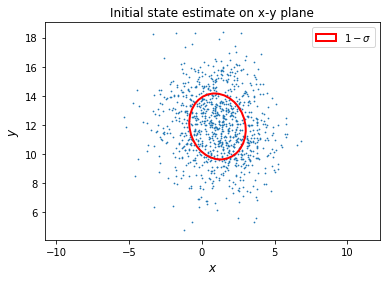

In [3]:
# Predict the state estimate at t=5
for t in range(5):
    for i in range(nParticles):
        # Generate a random sample of the velocity and angular velocity based on their Gaussian distributions and
        # predict the initial state estimate
        v = sigma_v * np.random.randn() + mu_v
        w = sigma_w * np.random.randn() + mu_w
        
        # Estimate a particle using previous state estimates
        particles[:,i] = particles[:,i] + np.array([v*np.cos(particles[2, i])*dt, 
                                                    v*np.sin(particles[2, i])*dt,
                                                    w])


# Plot state estimates at t=5
fig2, ax2 = plt.subplots()
ax2.scatter(particles[0,:], particles[1,:], s=0.5)
confidence_ellipse(particles[0,:], particles[1,:], ax2, n_std=1.0, label='$1-\sigma$', edgecolor='red', linewidth=2)
plt.title('Initial state estimate on x-y plane', fontsize=12)
plt.xlabel('$x$', fontsize=12)
plt.ylabel('$y$', fontsize=12)
plt.legend(loc='upper right')
plt.axis('equal')
plt.show()

#### `[15 points]` 3.3. Implement the particle filter where resampling happens everytime a range measurement is available (i.e., every 10 seconds). Plot the sample distribution and the 1-$\sigma$ sample ellipse on the $x$-$y$ plane at $t=0$ both before and after the update step.  

To implement the particle filter where resampling occurs at a frequency of $0.1 Hz$, we can use the modulus operator to check when $t$ is a factor of $10$ and sample a measurement following the Gaussian $d\sim \mathcal{N}(10, 1^2)$. For this problem, we will simply plot the sample distribution before the measurement update at $t=0$ and after the measurement update. 

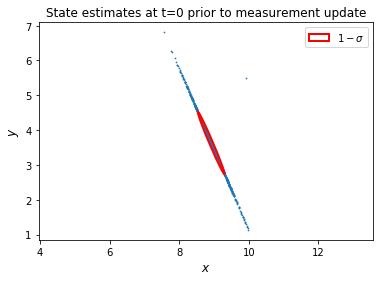

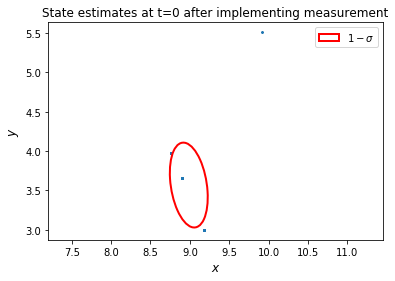

In [4]:
# Reset the particles array and create a weight vector
nParticles = 1000
particles = np.tile(mu0, [1, nParticles])
weights = np.zeros(nParticles)

# State estimates before implementing update
for i in range(nParticles):
    # Generate a random sample of the velocity and angular velocity based on their Gaussian distributions and
    # predict the initial state estimate
    v = sigma_v * np.random.randn() + mu_v
    w = sigma_w * np.random.randn() + mu_w
    
    # Estimate a particle using previous state estimates
    particles[:,i] = particles[:,i] + np.array([v*np.cos(particles[2, 0])*dt, 
                                                v*np.sin(particles[2, 0])*dt,
                                                w])
    
    # Check if the heading angle is greater than 2pi radians
    if particles[2,i] > 2*np.pi:
        particles[2,i] -= 2*np.pi   
    
# Randomly sample a measurement following the measurement's Gaussian distribution
z = sigma_z * np.random.randn() + mu_z

# Compute the weights for each particle
for i in range(nParticles):
    weights[i] = weight(particles[:,i], z)

# Resample proportionately with the weights
newParticles = low_variance_sampler(particles, weights)

# Check if the heading angle is greater than 2pi radians
for i in range(nParticles):
    if newParticles[2,i] > 2*np.pi:
        newParticles[2,i] -= 2*np.pi   

# Plot the state estimates before measurement update
fig3, ax3 = plt.subplots()
ax3.scatter(particles[0,:], particles[1,:], s=0.5)
confidence_ellipse(particles[0,:], particles[1,:], ax3, n_std=1.0, label='$1-\sigma$', edgecolor='red', linewidth=2)
plt.title('State estimates at t=0 prior to measurement update', fontsize=12)
plt.xlabel('$x$', fontsize=12)
plt.ylabel('$y$', fontsize=12)
plt.legend(loc='upper right')
plt.axis('equal')
plt.show()

# Plot the state estimates after measurement update
fig4, ax4 = plt.subplots()
ax4.scatter(newParticles[0,:], newParticles[1,:], s=0.5)
confidence_ellipse(newParticles[0,:], newParticles[1,:], ax4, n_std=1.0, label='$1-\sigma$', edgecolor='red', linewidth=2)
plt.title('State estimates at t=0 after implementing measurement', fontsize=12)
plt.xlabel('$x$', fontsize=12)
plt.ylabel('$y$', fontsize=12)
plt.legend(loc='upper right')
plt.axis('equal')
plt.show()

#### `[ 5 points]` 3.4. For $t=[0, 100]$, use Gaussian approximations of the particle set to plot the estimated states along with their 1-$\sigma$ bounds. You should have three separate plots, one for each state. 

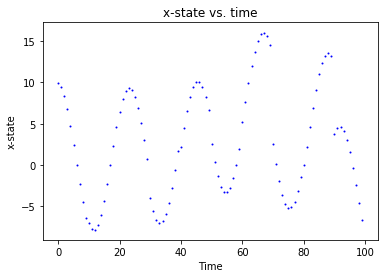

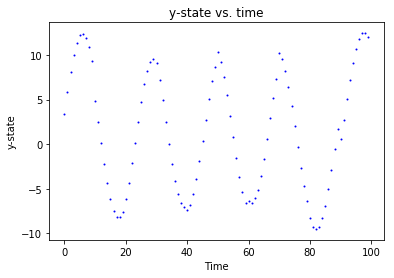

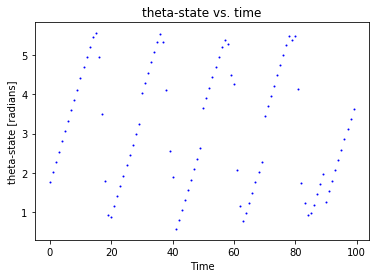

In [5]:
# Reset the particles array and create a weight vector
nParticles = 1000
particles = np.tile(mu0, [1, nParticles])
weights = np.zeros(nParticles)

# Setup the plots
fig5, ax5 = plt.subplots()
plt.title("x-state vs. time")
plt.xlabel("Time")
plt.ylabel("x-state")
fig6, ax6 = plt.subplots()
plt.title("y-state vs. time")
plt.xlabel("Time")
plt.ylabel("y-state")
fig7, ax7 = plt.subplots()
plt.title('theta-state vs. time')
plt.xlabel("Time")
plt.ylabel("theta-state [radians]")

# Particle Filter
for t in range(100):
    for i in range(nParticles):
        # Generate a random sample of the velocity and angular velocity based on their Gaussian distributions and
        # predict the initial state estimate
        v = sigma_v * np.random.randn() + mu_v
        w = sigma_w * np.random.randn() + mu_w
        
        # Estimate a particle using previous state estimates
        particles[:,i] = particles[:,i] + np.array([v*np.cos(particles[2, i])*dt, 
                                                    v*np.sin(particles[2, i])*dt,
                                                    w])
        
        # Check if the heading angle is greater than 2pi radians
        if particles[2,i] > 2*np.pi:
            particles[2,i] -= 2*np.pi         
        
    # Only resample and compute weights if there is a new measurement
    if (t % 10 == 0):
        # Randomly sample a measurement following the measurement's Gaussian distribution
        z = sigma_z * np.random.randn() + mu_z
        
        # Compute the weights for each particle
        for j in range(nParticles):
            weights[j] = weight(particles[:,j], z)
          
        # Resample proportionately with the weights
        particles = low_variance_sampler(particles, weights)  
        
        # Check if the heading angle is greater than 2pi radians
        for k in range(nParticles):
            if particles[2,k] > 2*np.pi:
                particles[2,k] -= 2*np.pi

    # Add the particles of the three states x, y, and theta
    x_mean = np.mean(particles[0,:])
    y_mean = np.mean(particles[1,:])
    theta_mean = np.mean(particles[2,:])
    
    ax5.scatter(t, x_mean, c='b', s=1)
    ax6.scatter(t, y_mean, c='b', s=1)
    ax7.scatter(t, theta_mean, c='b', s=1)